In [1]:
# NO CODE 

from datascience import *
from prob140 import *
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [2]:
# NO CODE

def simulate_T1_T2(N, n):
    tanks = np.arange(1, N+1)
    sample = np.random.choice(tanks, size=n)
    t1 = 2*np.mean(sample)-1
    t2 = max(sample)
    return [t1, t2]

def compare_T1_T2(N, n, repetitions):
    tbl = Table(['2*Mean - 1', 'Max'])
    for i in np.arange(repetitions):
        tbl.append(simulate_T1_T2(N, n))
    
    tbl.hist(bins=np.arange(N/2, 3*N/2))
    plt.title('$N =$'+str(N)+', $n =$'+str(n)+' ('+str(repetitions)+' repetitions)');

## Examples ##

We have seen in the previous section that when assessing an estimator, the bias and variance of the estimator are the *only* aspects of the estimator that determine its mean-squared error. In this section, we'll take a look at some examples of estimators through the lens of this bias-variance decomposition.

### The German Tank Problem, Revisited
Earlier in the course we examined the [German tank problem](ch5.4.7) in which statisticians helped the Allies estimate the number of tanks Germany was manufacturing in World War II. 

We will continue to use a simpler model than the one the Allies had used. We will start by assuming, as the Allies had, that the tanks were numbered sequentially from 1 through $N$. The goal was to estimate $N$ from the serial numbers on the tanks that were observed. Our model says that these numbers were like draws *with* replacement from $1, 2, 3, \ldots, N$. 

As that's not a great model for serial numbers observed on tanks that have been captured or destroyed, the Allies assumed that the draws were without replacement. But we can still get a good sense of the estimates by using the simpler model of independent draws. The number of captured or destroyed tanks was small relative to the number produced, so it is reasonable to assume that $n$ is quite a bit smaller than $N$. In that situation there isn't much difference between drawing with and without replacement.

Formally, we are assuming that the serial numbers of the observed tanks are random variables $X_1, X_2, \ldots, X_n$ drawn uniformly at random with replacement from $\{1, 2, 3, \ldots, N\}$. 

Since $X_1, X_2, \ldots, X_n$ are i.i.d. uniform on $\{1, 2, 3, \ldots, N\}$, for each $i$ we have

$$
E(X_i) ~ = ~ \frac{N+1}{2} 
$$

Hence if $\bar{X}$ is the sample average, then

$$
E(\bar{X}) ~ = ~ \frac{N+1}{2}
$$

This is a linear function of the parameter $N$. So by inverting the function (that is, isolating $N$), we can construct an unbiased estimator of $N$. We have

$$
N ~ = ~ 2E(\bar{X}) - 1
$$

This is an equality of constants, but we'll never know $E(\bar{X})$ because that quantity involves $N$  which is exactly what we are trying to estimate. However, by linearity of expectation, the random variable

$$
T_1 ~ = ~ 2\bar{X} - 1
$$

has expectation $N$ and hence is an unbiased estimator of $N$. It can be calculated based on the sample $X_1, X_2, \ldots, X_n$. 

We have called this estimator $T_1$ because it is the first of two competing estimators of $N$.

Another natural estimator of $N$ is $T_2 = \max\{X_1, X_2, \ldots, X_n\}$, the maximum of the observed numbers. This estimator is clearly biased. It is always less than or equal to $N$. So on average, it will underestimate $N$.

But not by much! The figure below shows the empirical histograms of $T_1$ and $T_2$ based on 10,000 repetitions of drawing a random sample of size 30 with replacement from the integers $1$ through $300$ and computing $T_1$ and $T_2$ for each sample. You can see that the distribution of the sample maximum $T_2$ puts a lot of mass just to the left of the population maximum $300$.

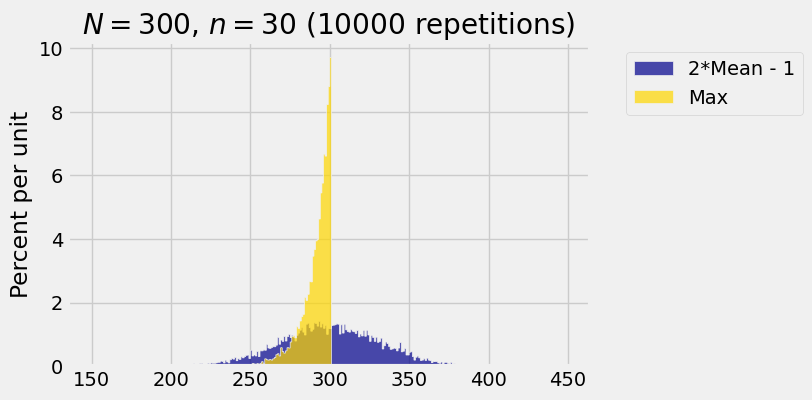

In [3]:
# NO CODE

compare_T1_T2(300, 30, 10000)

The blue histogram shows the empirical distribution of $T_1 = 2\bar{X} - 1$. It is roughly normal because the distribution of $\bar{X}$ is roughly normal by the Central Limit Theorem. 

The blue histogram is centered at $N = 300$, the value of $N$ that we chose for the simulation. That is because $T_1$ is an unbiased estimator of $N$.

The gold histogram displays the distribution of $T_2 = \max\{1, 2, 3, \ldots, N\}$. It is entirely to the left of $N = 300$, confirming our assertion that $T_2$ underestimates $N$. However, the gold histogram is quite a bit narrower than the blue and puts most of its probability very close to the parameter $N$. 

This is a situation in which we might prefer to use the somewhat biased estimator $T_2$ over the unbiased but widely variable estimator $T_1$. If both the bias and the variance of an estimator are small, then the mean squared error of the estimator will be small. If the bias is zero but the variance is large then the mean squared error will be large.

### Calculating Mean Squared Error

For a parameter $\theta > 0$, let $X$ have the density given by

$$
f_\theta(x) ~ = ~ 
\begin{cases}
\frac{2}{\theta^2}(\theta - x) & \text{for } 0 < x < \theta \\
0 & \text{otherwise}
\end{cases}
$$

The graph of the density is shown below. Check that you agree with the values of $f_\theta(x)$ shown for $x=0$, $x = \theta/2$, and $x = \theta$.

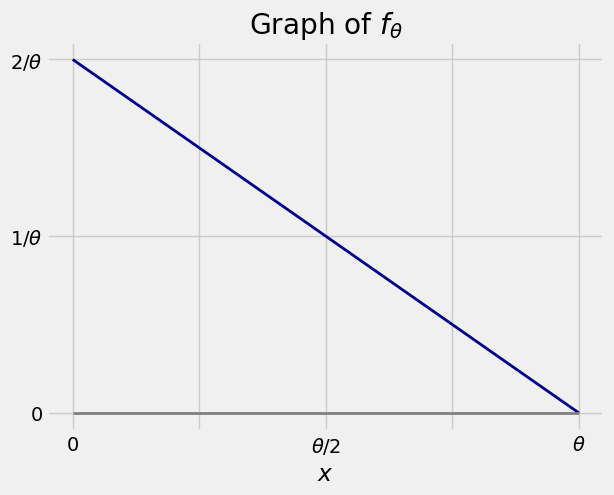

In [4]:
# NO CODE

theta = 2
x = np.arange(0, theta+0.01, 0.01)
f = (2/(theta**2))*(theta - x)
plt.plot(x, f, color='darkblue', lw=2)
plt.plot([0, theta], [0, 0], lw=2, color='grey')
plt.xticks(np.arange(0, 2.1, 0.5), ['0', '', '$\\theta/2$', '', '$\\theta$'])
plt.yticks([0, 1/theta, 2/theta], ['0', '$1/\\theta$', '$2/\\theta$'])
plt.xlabel('$x$')
plt.title('Graph of $f_\\theta$');

Our goal is to estimate $\theta$ based on $X$. Let's try simply using $X$ as our estimator, and find the mean squared error. 

**Bias:** Since $X$ is always less than $\theta$, we know that this estimator will underestimate $\theta$ and thus have a negative bias. To find the value of the bias, we first need the expectation of $X$.

$$
\begin{align*}
E_\theta(X) ~ &= ~ \int_0^\theta x \cdot \frac{2}{\theta^2}(\theta - x)dx \\
&= ~ \frac{2}{\theta^2}\big{(} \int_0^\theta \theta xdx - \int_0^\theta x^2dx \big{)}\\
&= ~ \frac{2}{\theta^2}\big{(} \theta \cdot \frac{\theta^2}{2} - \frac{\theta^3}{3} \big{)}\\
&= ~ \theta - \frac{2}{3}\theta\\
&= ~ \frac{1}{3}\theta
\end{align*}
$$

The bias of $X$ as an estimator of $\theta$ is thus

$$
B_\theta(X) ~=~ E_\theta(X) - \theta ~=~ -\frac{2}{3}\theta.
$$

The calculation shows that the bias gets worse as $\theta$ gets larger. This makes sense. We know that $X$ has to be between $0$ and $\theta$. If $\theta$ is small, $X$ is sandwiched between $0$ and $\theta$ without much wiggle room, and therefore can't be very much less than $\theta$. The bigger $\theta$ gets, the more room there is below $\theta$. Hence $X$ can be further away from $\theta$.

**Variance:** To find the variance of $X$, we first need the expected square.

$$
\begin{align*}
E_\theta(X^2) ~ &= ~ \int_0^\theta x^2 \cdot \frac{2}{\theta^2}(\theta - x)dx \\
&= ~ \frac{2}{\theta^2}\big{(} \int_0^\theta \theta x^2dx - \int_0^\theta x^3dx \big{)}\\
&= ~ \frac{2}{\theta^2}\big{(} \theta \cdot \frac{\theta^3}{3} - \frac{\theta^4}{4} \big{)}\\
&= ~ \frac{2}{3}\theta^2 - \frac{1}{2}\theta^2\\
&= ~ \frac{1}{6}\theta^2
\end{align*}
$$

The variance is

$$
Var_\theta(X) ~ = ~ \frac{1}{6}\theta^2 ~ - ~ \big{(} \frac{1}{3}\theta \big{)}^2 ~ = ~ \frac{1}{18} \theta^2
$$

**Mean Squared Error:** We can now find the mean squared error of using $X$ as an estimator of $\theta$.

$$
\begin{align*}
MSE_\theta(X) ~ &= ~ Var_\theta(X) + B_\theta^2(X) \\
&= ~ \frac{1}{18} \theta^2 + \big{(} -\frac{2}{3}\theta \big{)}^2 \\
&= ~ \frac{1}{18} \theta^2 + \frac{4}{9}\theta^2 \\
&= ~ \frac{1}{2}\theta^2
\end{align*}
$$

Since $X$ is a biased estimator of $\theta$, let's see if we can construct an unbiased estimator of $\theta$ and find its mean squared error. Then we can see whether one of the estimators is better than the other.

We showed that $E_\theta(X) = \frac{1}{3}\theta$. Hence $3X$ is an unbiased estimator of $\theta$. The mean squared error in using $3X$ to estimate $\theta$ is

$$
\begin{align*}
MSE_\theta(3X) ~ &= ~ Var_\theta(3X) + B_\theta^2(3X) \\
&= ~ 3^2Var(X) + 0^2 \\
&= ~ 9\cdot \frac{1}{18}\theta^2 \\
&= ~ \frac{1}{2} \theta^2
\end{align*}
$$

That is exactly the same mean squared error as the one we got when we used $X$ as the estimator of $\theta$. The estimator $3X$ eliminates the bias that we had when using $X$, but it has higher variance.  

Since the two estimators $X$ and $3X$ have the same mean squared error, which should you use if you want to estimate $\theta$? One factor to consider is that $3X$ overestimates $\theta$ if $X$ is bigger than $\theta/3$, whereas $X$ never overestimates $\theta$. If the possibility of overestimation is a problem, then $X$ is the better choice. But if overestimation is not a problem then $3X$ is a good choice since it is unbiased.